In [ ]:
!pip install geoplot

##Import

In [2]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

##Dataset SHP Indonesia

Data peta Indonesia didapatkan di [Indonesia-Geospasial.com](https://www.indonesia-geospasial.com/2020/05/download-data-peta.html)

In [ ]:
!gdown --id 175jYKEOWpb4WnRmmeRSQ8CehjhTqrx6c
!gdown --id 1DaiM0z0wkJLGYJGQNJiiRbL0lD3q-pgo
!gdown --id 1K8Q0ONWXaspVOod78F3J8foFlMZ1DsSU
!gdown --id 1ue7AKWrtRTeAObUoCWHEfG225Yf5ULmq

In [4]:
dataset = gpd.read_file('BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp')
dataset.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."


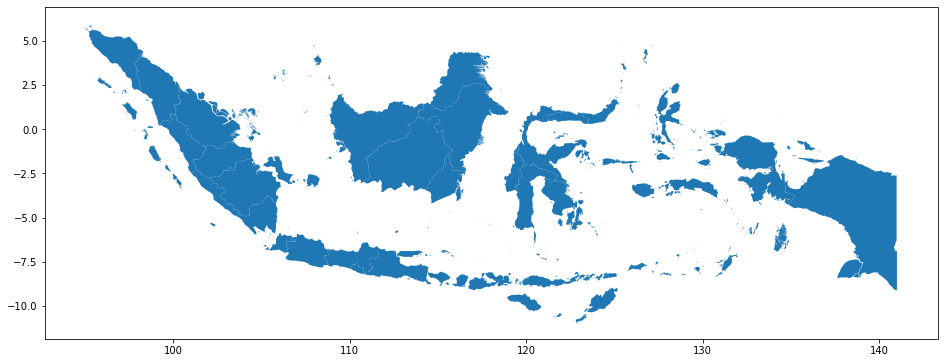

In [5]:
dataset.plot(figsize=(16,10))

In [6]:
!gdown --id 1K1aDY8ioZhqynB7skPQeO5n-IKhJwG-y

Downloading...
From: https://drive.google.com/uc?id=1K1aDY8ioZhqynB7skPQeO5n-IKhJwG-y
To: /content/cv19_province.csv
100% 106k/106k [00:00<00:00, 39.6MB/s]


In [7]:
cv19_prov = pd.read_csv('cv19_province.csv')
cv19_prov.head()

,PROVINSI,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/1/2020,7/2/2020,7/3/2020,7/4/2020,7/5/2020,7/6/2020,7/7/2020,7/8/2020,7/9/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020,8/29/2020,8/30/2020,8/31/2020,9/1/2020,9/2/2020,9/3/2020,9/4/2020,9/5/2020,9/6/2020,9/7/2020,9/8/2020,9/9/2020,9/10/2020,9/11/2020,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020,9/17/2020,9/18/2020,9/19/2020,9/20/2020,9/21/2020,9/22/2020,9/23/2020,9/24/2020,9/25/2020,9/26/2020,9/27/2020,9/28/2020,9/29/2020,9/30/2020,10/1/2020,10/2/2020,10/3/2020,10/4/2020,10/5/2020,10/6/2020,10/7/2020,10/8/2020,10/9/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,10/31/2020,11/1/2020,11/2/2020,11/3/2020,11/4/2020,11/5/2020,11/6/2020,11/7/2020,11/8/2020,11/9/2020,11/10/2020,11/11/2020,11/12/2020,11/13/2020,11/14/2020,11/15/2020,11/16/2020,11/17/2020,11/18/2020,11/19/2020,11/20/2020,11/21/2020,...,1/24/2021,1/25/2021,1/26/2021,1/27/2021,1/28/2021,1/29/2021,1/30/2021,1/31/2021,2/1/2021,2/2/2021,2/3/2021,2/4/2021,2/5/2021,2/6/2021,2/7/2021,2/8/2021,2/9/2021,2/10/2021,2/11/2021,2/12/2021,2/13/2021,2/14/2021,2/15/2021,2/16/2021,2/17/2021,2/18/2021,2/19/2021,2/20/2021,2/21/2021,2/22/2021,2/23/2021,2/24/2021,2/25/2021,2/26/2021,2/27/2021,2/28/2021,3/1/2021,3/2/2021,3/3/2021,3/4/2021,3/5/2021,3/6/2021,3/7/2021,3/8/2021,3/9/2021,3/10/2021,3/11/2021,3/12/2021,3/13/2021,3/14/2021,3/15/2021,3/16/2021,3/17/2021,3/18/2021,3/19/2021,3/20/2021,3/21/2021,3/22/2021,3/23/2021,3/24/2021,3/25/2021,3/26/2021,3/27/2021,3/28/2021,3/29/2021,3/30/2021,3/31/2021,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021,4/11/2021,4/12/2021,4/13/2021,4/14/2021,4/15/2021,4/16/2021,4/17/2021,4/18/2021,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,4/26/2021,4/27/2021,4/28/2021,4/29/2021,4/30/2021,5/1/2021,5/2/2021,5/3/2021,5/4/2021,5/5/2021,5/6/2021,5/7/2021,5/8/2021,5/9/2021,5/10/2021,5/11/2021,5/12/2021,5/13/2021,5/14/2021,5/15/2021,5/16/2021,5/17/2021,5/18/2021,5/19/2021,5/20/2021,5/21/2021,5/22/2021,5/23/2021,5/24/2021,5/25/2021,5/26/2021,5/27/2021,5/28/2021,5/29/2021,5/30/2021,5/31/2021,6/1/2021,6/2/2021,6/3/2021,6/4/2021,6/5/2021,6/6/2021,6/7/2021,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021,6/18/2021,6/19/2021,6/20/2021,6/21/2021,6/22/2021,6/23/2021,6/24/2021,6/25/2021,6/26/2021,6/27/2021,6/28/2021,6

##Dataset COVID-19.
Data didapatkan di [spreedsheet @kawalcovid19](https://docs.google.com/spreadsheets/u/1/d/1ma1T9hWbec1pXlwZ89WakRk-OfVUQZsOCFl4FwZxzVw/htmlview#)

In [8]:
cv19 = dataset.merge(cv19_prov, on="PROVINSI")
cv19.head(3)

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020,5/28/2020,5/29/2020,5/30/2020,5/31/2020,6/1/2020,6/2/2020,6/3/2020,6/4/2020,6/5/2020,6/6/2020,6/7/2020,6/8/2020,6/9/2020,6/10/2020,6/11/2020,6/12/2020,6/13/2020,6/14/2020,6/15/2020,6/16/2020,6/17/2020,6/18/2020,6/19/2020,6/20/2020,6/21/2020,6/22/2020,6/23/2020,6/24/2020,6/25/2020,6/26/2020,6/27/2020,6/28/2020,6/29/2020,6/30/2020,7/1/2020,7/2/2020,7/3/2020,7/4/2020,7/5/2020,7/6/2020,7/7/2020,7/8/2020,7/9/2020,7/10/2020,7/11/2020,7/12/2020,7/13/2020,7/14/2020,7/15/2020,7/16/2020,7/17/2020,7/18/2020,7/19/2020,7/20/2020,7/21/2020,7/22/2020,7/23/2020,7/24/2020,7/25/2020,7/26/2020,7/27/2020,7/28/2020,7/29/2020,7/30/2020,7/31/2020,8/1/2020,8/2/2020,8/3/2020,8/4/2020,8/5/2020,8/6/2020,8/7/2020,8/8/2020,8/9/2020,8/10/2020,8/11/2020,8/12/2020,8/13/2020,8/14/2020,8/15/2020,8/16/2020,8/17/2020,8/18/2020,8/19/2020,8/20/2020,8/21/2020,8/22/2020,8/23/2020,8/24/2020,8/25/2020,8/26/2020,8/27/2020,8/28/2020,8/29/2020,8/30/2020,8/31/2020,9/1/2020,9/2/2020,9/3/2020,9/4/2020,9/5/2020,9/6/2020,9/7/2020,9/8/2020,9/9/2020,9/10/2020,9/11/2020,9/12/2020,9/13/2020,9/14/2020,9/15/2020,9/16/2020,9/17/2020,9/18/2020,9/19/2020,9/20/2020,9/21/2020,9/22/2020,9/23/2020,9/24/2020,9/25/2020,9/26/2020,9/27/2020,9/28/2020,9/29/2020,9/30/2020,10/1/2020,10/2/2020,10/3/2020,10/4/2020,10/5/2020,10/6/2020,10/7/2020,10/8/2020,10/9/2020,10/10/2020,10/11/2020,10/12/2020,10/13/2020,10/14/2020,10/15/2020,10/16/2020,10/17/2020,10/18/2020,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,10/31/2020,11/1/2020,11/2/2020,11/3/2020,11/4/2020,11/5/2020,11/6/2020,11/7/2020,11/8/2020,11/9/2020,11/10/2020,11/11/2020,11/12/2020,11/13/2020,11/14/2020,11/15/2020,11/16/2020,11/17/2020,...,1/24/2021,1/25/2021,1/26/2021,1/27/2021,1/28/2021,1/29/2021,1/30/2021,1/31/2021,2/1/2021,2/2/2021,2/3/2021,2/4/2021,2/5/2021,2/6/2021,2/7/2021,2/8/2021,2/9/2021,2/10/2021,2/11/2021,2/12/2021,2/13/2021,2/14/2021,2/15/2021,2/16/2021,2/17/2021,2/18/2021,2/19/2021,2/20/2021,2/21/2021,2/22/2021,2/23/2021,2/24/2021,2/25/2021,2/26/2021,2/27/2021,2/28/2021,3/1/2021,3/2/2021,3/3/2021,3/4/2021,3/5/2021,3/6/2021,3/7/2021,3/8/2021,3/9/2021,3/10/2021,3/11/2021,3/12/2021,3/13/2021,3/14/2021,3/15/2021,3/16/2021,3/17/2021,3/18/2021,3/19/2021,3/20/2021,3/21/2021,3/22/2021,3/23/2021,3/24/2021,3/25/2021,3/26/2021,3/27/2021,3/28/2021,3/29/2021,3/30/2021,3/31/2021,4/1/2021,4/2/2021,4/3/2021,4/4/2021,4/5/2021,4/6/2021,4/7/2021,4/8/2021,4/9/2021,4/10/2021,4/11/2021,4/12/2021,4/13/2021,4/14/2021,4/15/2021,4/16/2021,4/17/2021,4/18/2021,4/19/2021,4/20/2021,4/21/2021,4/22/2021,4/23/2021,4/24/2021,4/25/2021,4/26/2021,4/27/2021,4/28/2021,4/29/2021,4/30/2021,5/1/2021,5/2/2021,5/3/2021,5/4/2021,5/5/2021,5/6/2021,5/7/2021,5/8/2021,5/9/2021,5/10/2021,5/11/2021,5/12/2021,5/13/2021,5/14/2021,5/15/2021,5/16/2021,5/17/2021,5/18/2021,5/19/2021,5/20/2021,5/21/2021,5/22/2021,5/23/2021,5/24/2021,5/25/2021,5/26/2021,5/27/2021,5/28/2021,5/29/2021,5/30/2021,5/31/2021,6/1/2021,6/2/2021,6/3/2021,6/4/2021,6/5/2021,6/6/2021,6/7/2021,6/8/2021,6/9/2021,6/10/2021,6/11/2021,6/12/2021,6/13/2021,6/14/2021,6/15/2021,6/16/2021,6/17/2021,6/18/2021,6/19/2021,6/20/2021,6/21/2021,6/22/2021,6/23/2021,6/24/2021,6/25/2021,6/26/2021,6/27/2021,6/28/2021,6/29/

##Data Cleansing

In [9]:
df_cv19 = cv19[['PROVINSI','Shape_Leng', 'Shape_Area', 'geometry', '5/1/2021']]
df_cv19['5/1/2021'] = df_cv19['5/1/2021'].apply(pd.to_numeric)
df_cv19.head(3)

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,PROVINSI,Shape_Leng,Shape_Area,geometry,5/1/2021
0,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97...",11169
1,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",44813
2,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",47396


##Plotting map

Text(0.5, 1.0, 'Jumlah Kumulatif Positif COvid-19 di Indonesia pada 1 Mei 2021')

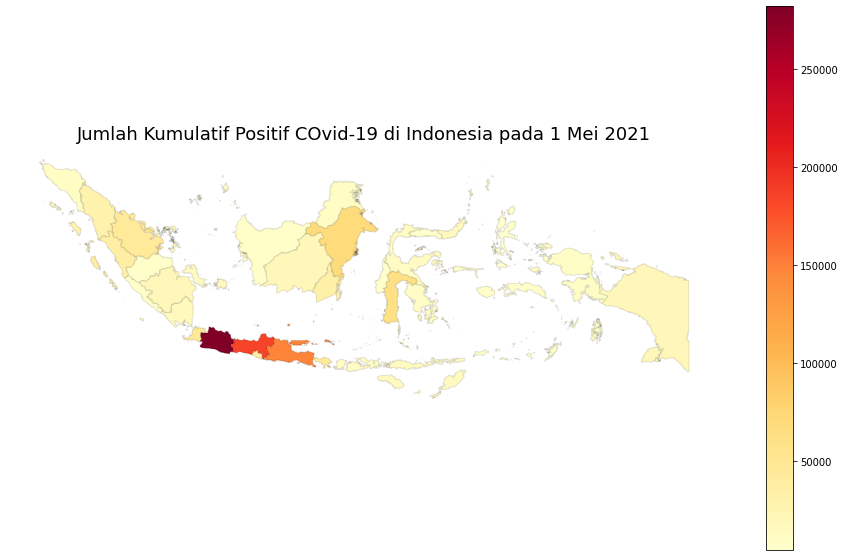

In [12]:
ax = df_cv19.plot(
    column='5/1/2021',
    cmap='YlOrRd',
    figsize=(16,10),
    edgecolor=(0,0,0, 0.1),
    legend=True,
)
ax.set_axis_off();
ax.set_title(
    "Jumlah Kumulatif Positif COvid-19 di Indonesia pada 1 Mei 2021",
    fontsize=18
)